In [31]:
import pandas as pd #Data handling
import numpy as np #linear algebra
import seaborn as sns #for analysing using visualisation
from matplotlib import pyplot as plt #for analysing using visualisation
from sklearn.linear_model import LinearRegression #Algortithm for model creation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Algortithm for model creation
from sklearn.model_selection import train_test_split #Splitting data for training and testing model 
from sklearn.metrics import mean_squared_error #Test the model performance
from sklearn.model_selection import cross_val_score #Cross validating the best models
from sklearn.feature_selection import SelectFromModel #For feature selection, it helps in removing the most redundant feature in the list
from sklearn.model_selection import RandomizedSearchCV #For hyper parameter tuning
from xgboost import XGBRegressor #Algortithm for model creationc

In [6]:
gd = pd.read_csv('data.csv')
gd.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [7]:
print('Data contains', gd.shape[0], 'rows and', gd.shape[1], 'columns')

Data contains 62184 rows and 11 columns


In [8]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [9]:
gd.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [10]:
gd.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [11]:
gd = gd.drop('date' ,axis = 1) #Droping date column because it is not needed for modelling

In [12]:
gd['temperature'] = np.round(gd['temperature']) 
gd['temperature'] = gd['temperature'].astype('int64') 

number_people


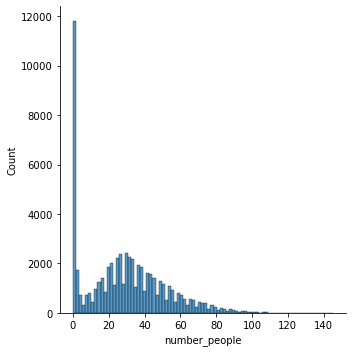

timestamp


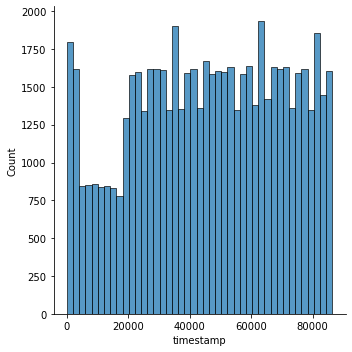

day_of_week


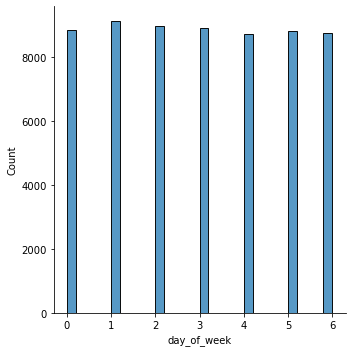

is_weekend


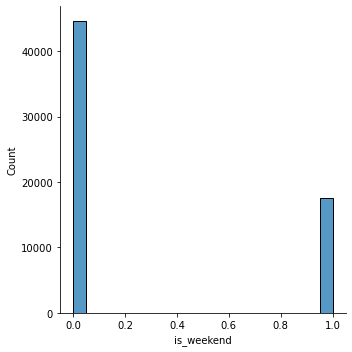

is_holiday


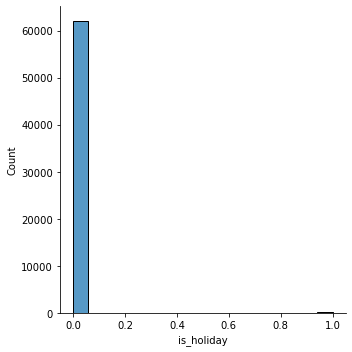

temperature


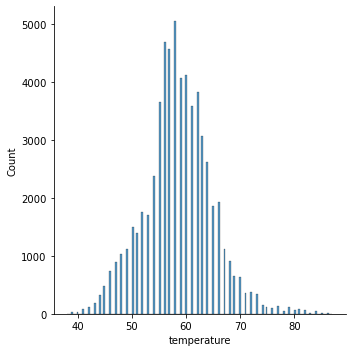

is_start_of_semester


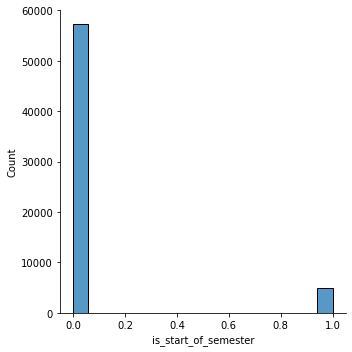

is_during_semester


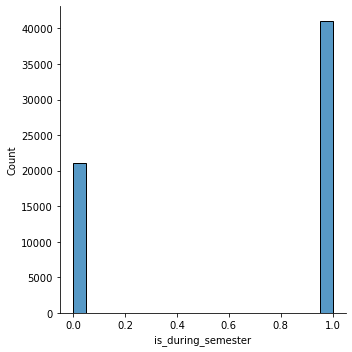

month


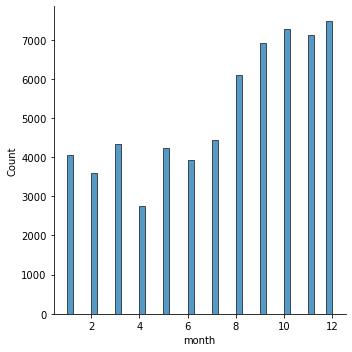

hour


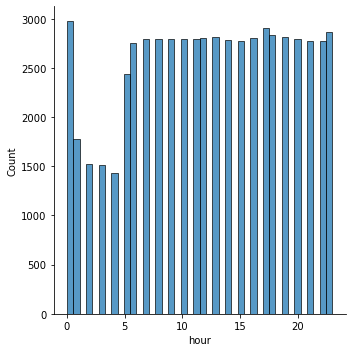

In [13]:
def univariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            print(i)
            sns.displot(x=frame[i])
            plt.show()
                
        elif(frame[i].dtype == 'float64'):
            print(i)
            sns.displot(x=frame[i])
            plt.show()
            
univariant(gd)

number_people VS timestamp


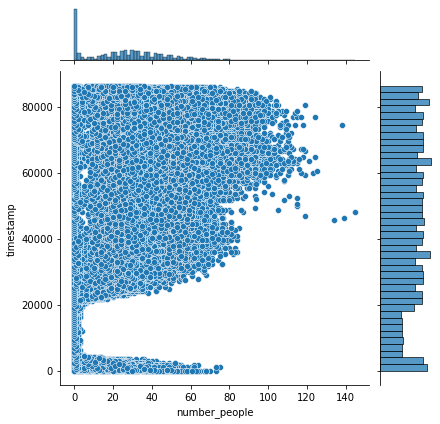

number_people VS day_of_week


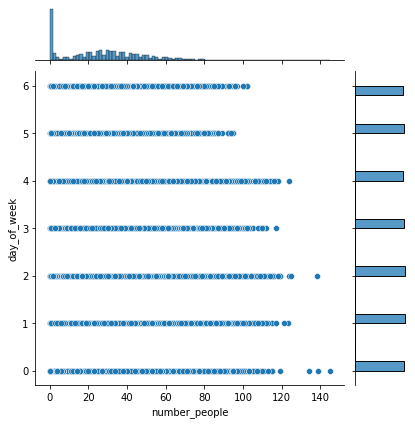

number_people VS is_weekend


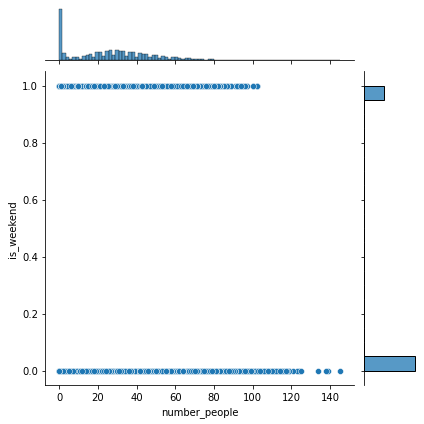

number_people VS is_holiday


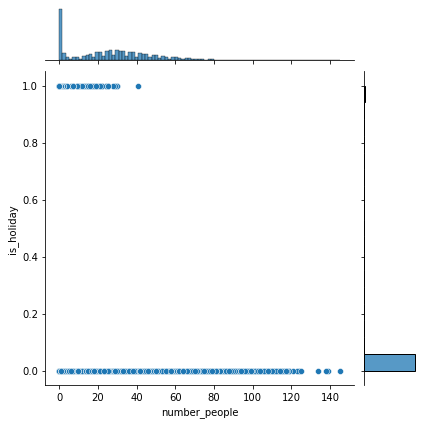

number_people VS temperature


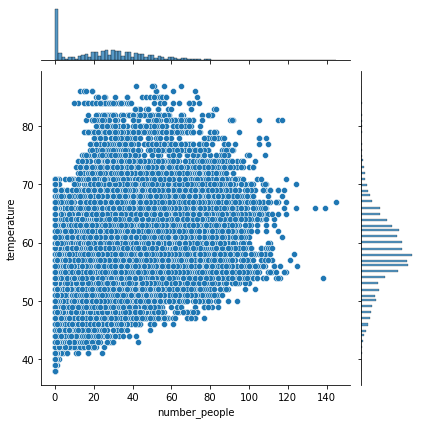

number_people VS is_start_of_semester


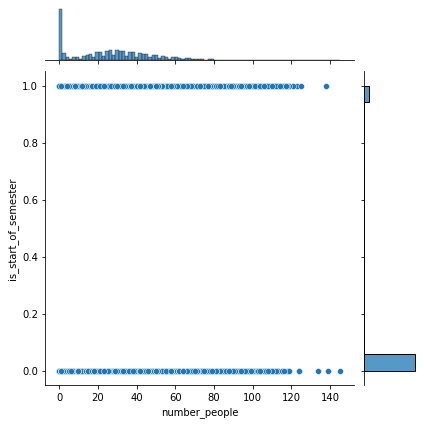

number_people VS is_during_semester


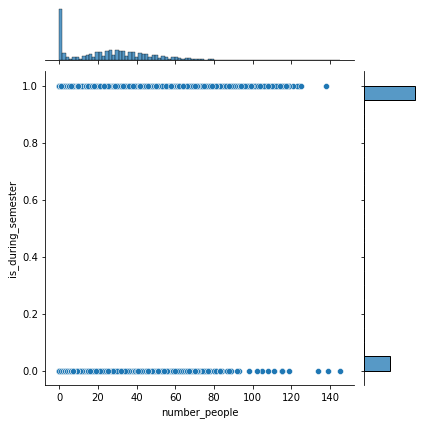

number_people VS month


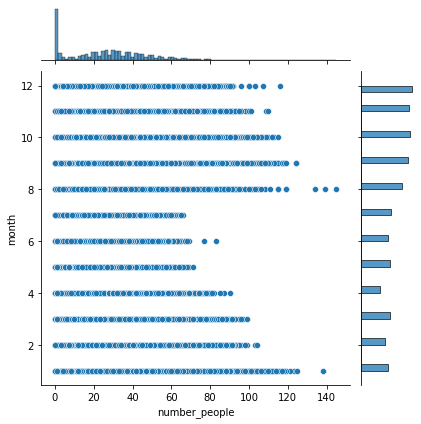

number_people VS hour


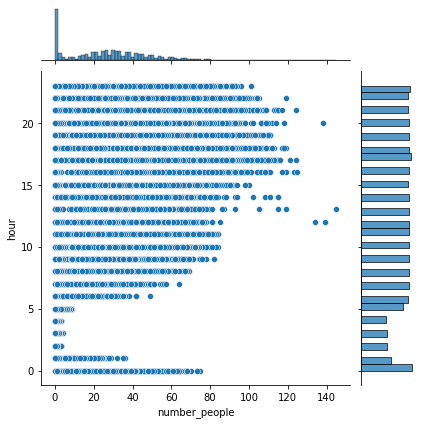

timestamp VS number_people


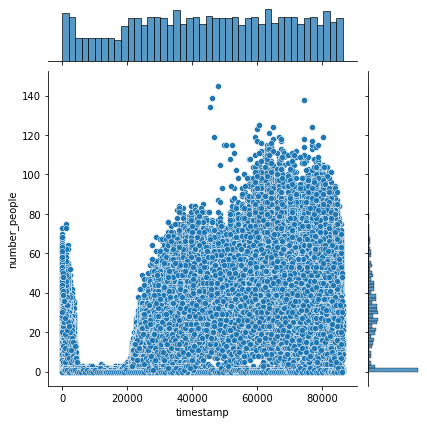

timestamp VS day_of_week


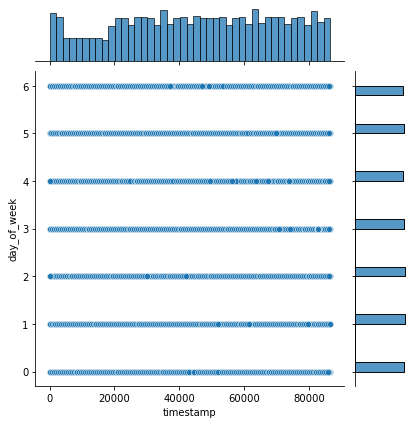

timestamp VS is_weekend


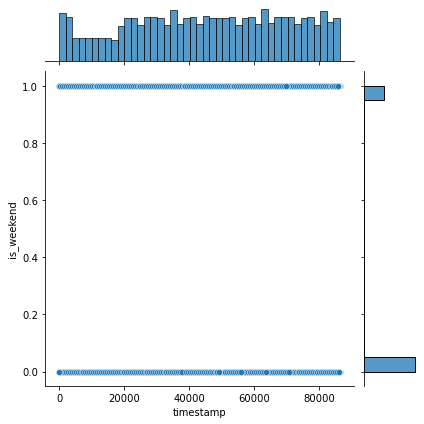

timestamp VS is_holiday


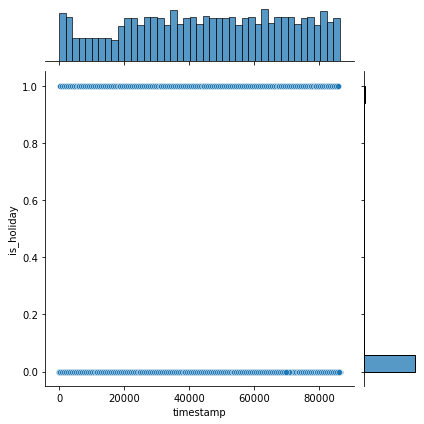

timestamp VS temperature


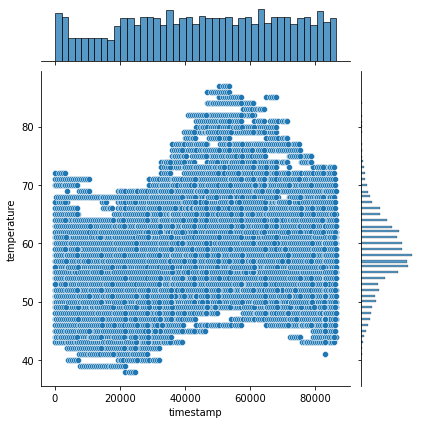

timestamp VS is_start_of_semester


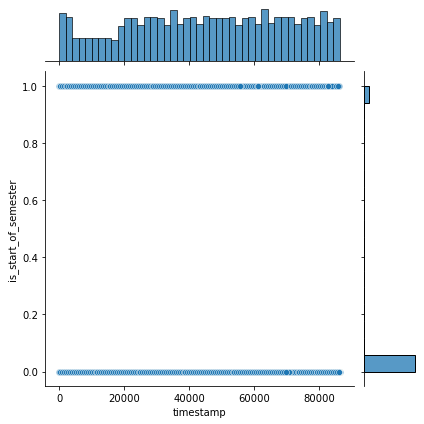

timestamp VS is_during_semester


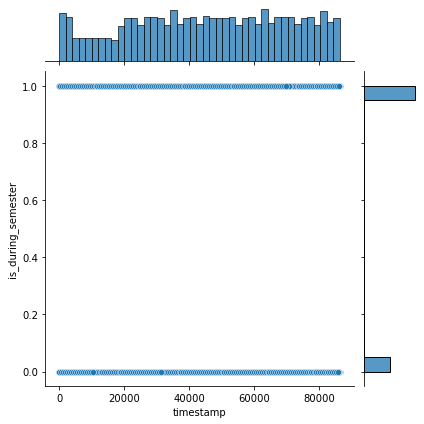

timestamp VS month


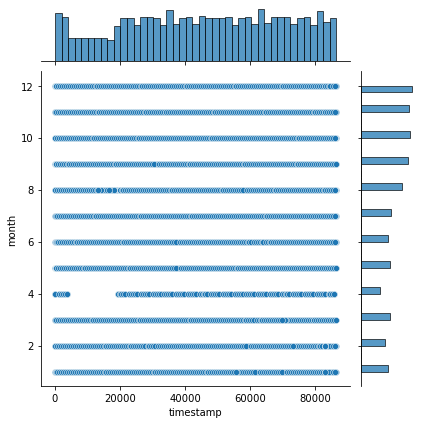

timestamp VS hour


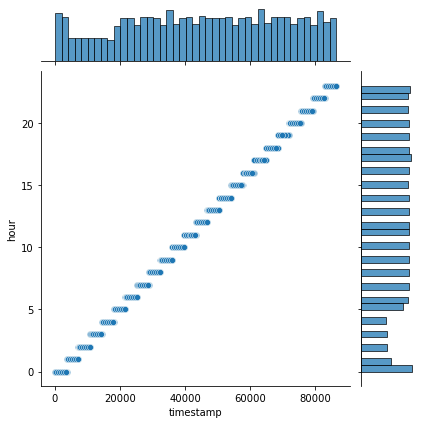

day_of_week VS number_people


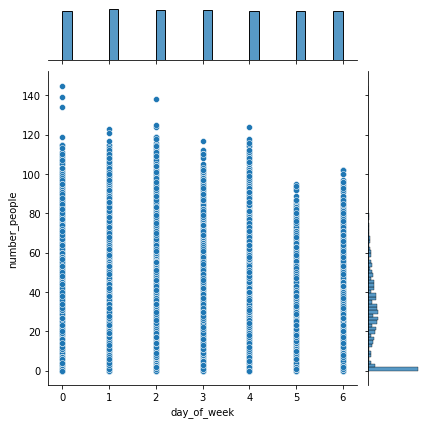

day_of_week VS timestamp


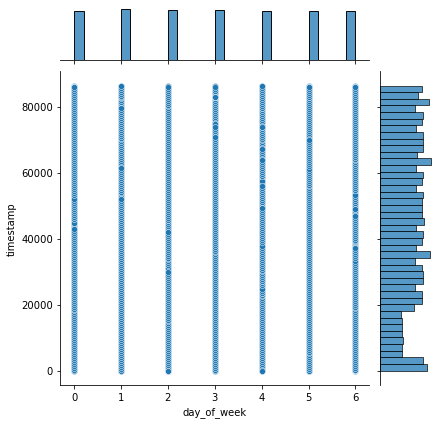

day_of_week VS is_weekend


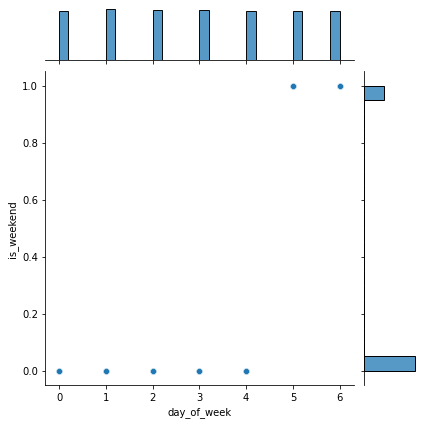

day_of_week VS is_holiday


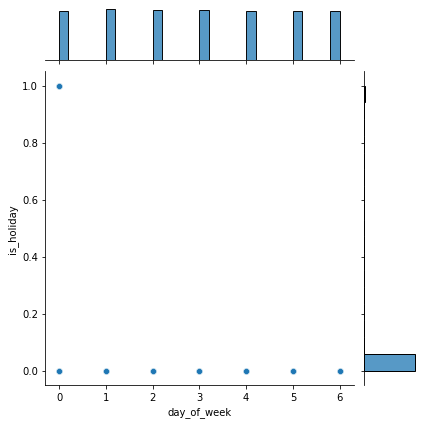

day_of_week VS temperature


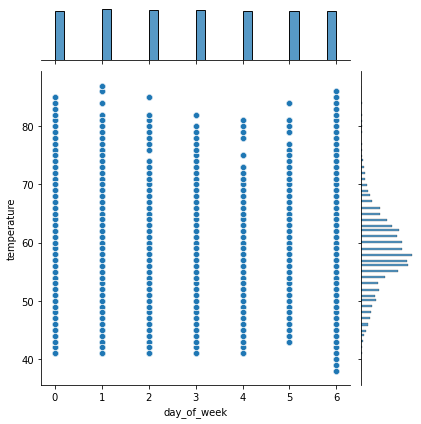

day_of_week VS is_start_of_semester


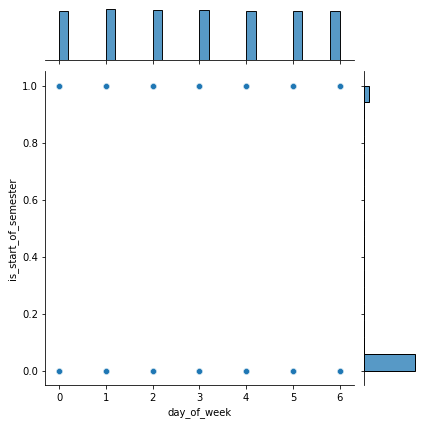

day_of_week VS is_during_semester


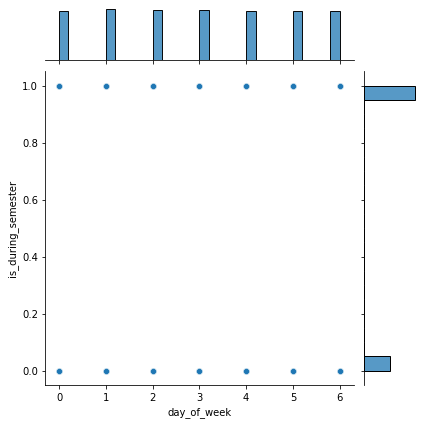

day_of_week VS month


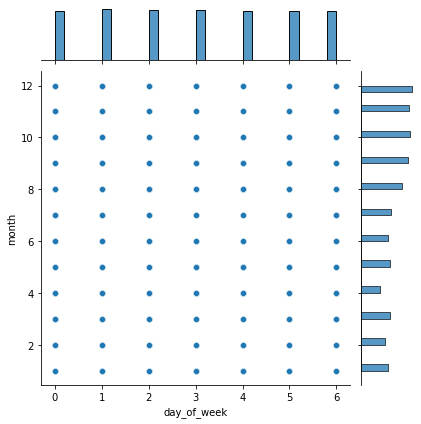

day_of_week VS hour


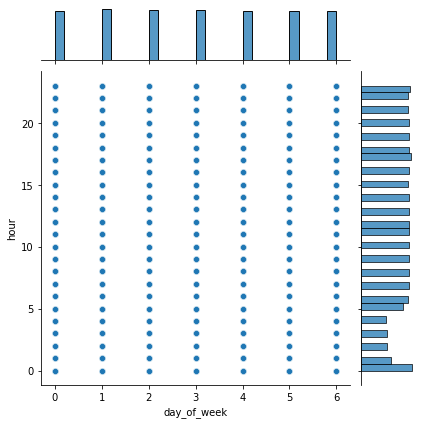

is_weekend VS number_people


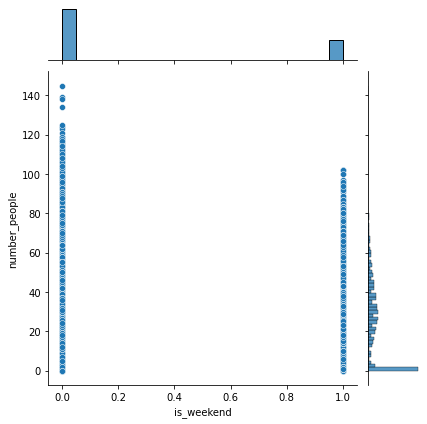

is_weekend VS timestamp


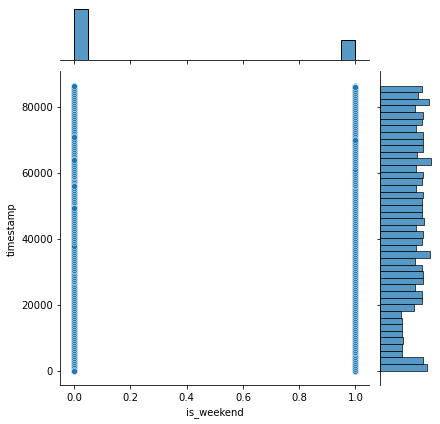

is_weekend VS day_of_week


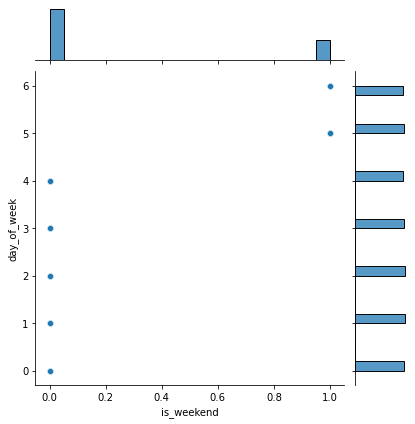

is_weekend VS is_holiday


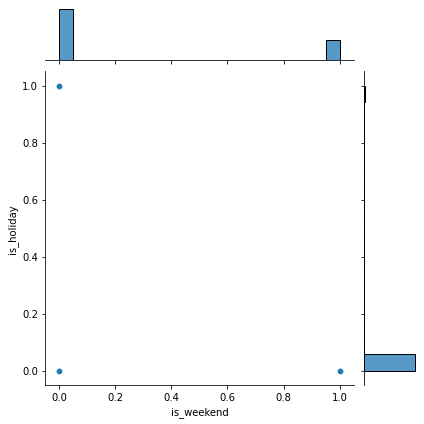

is_weekend VS temperature


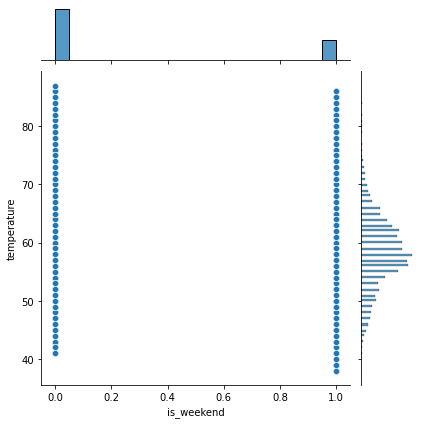

is_weekend VS is_start_of_semester


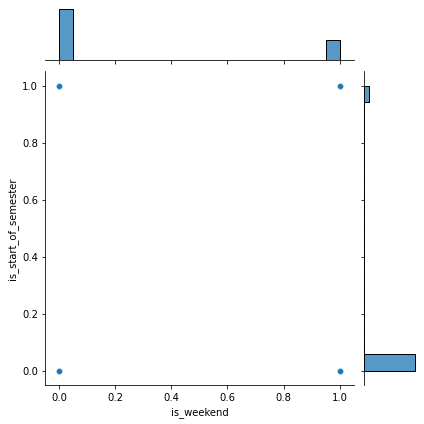

is_weekend VS is_during_semester


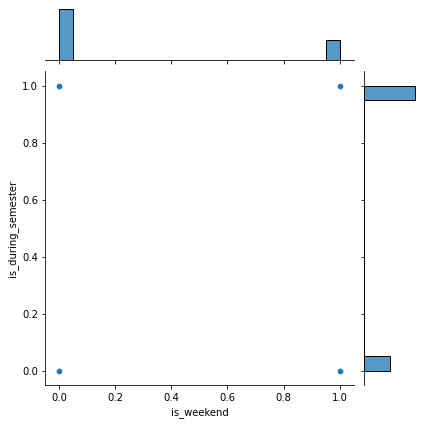

is_weekend VS month


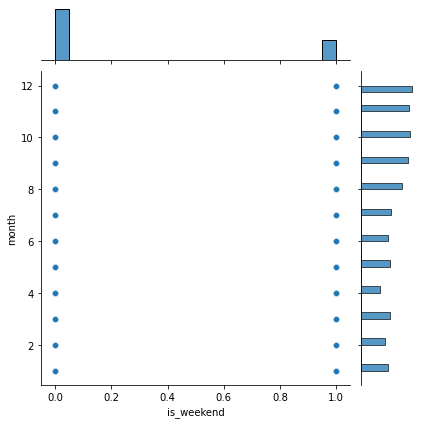

is_weekend VS hour


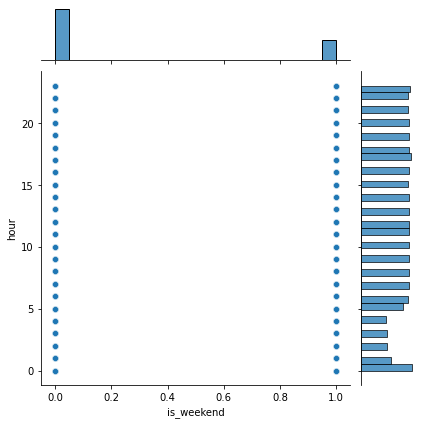

is_holiday VS number_people


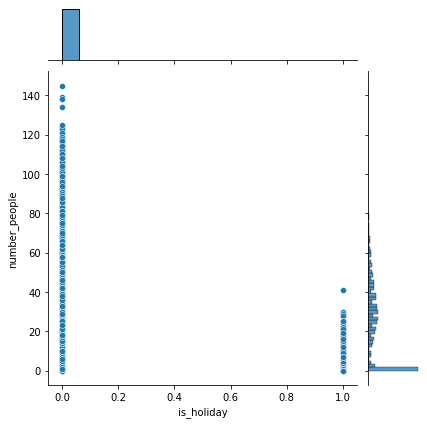

is_holiday VS timestamp


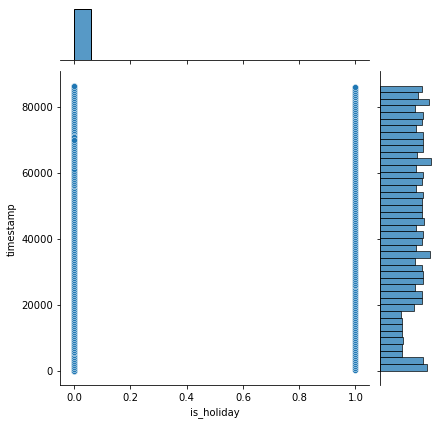

is_holiday VS day_of_week


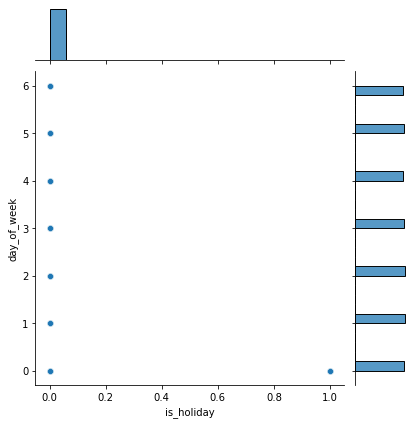

is_holiday VS is_weekend


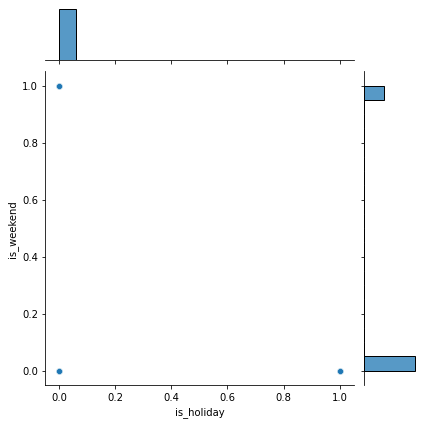

is_holiday VS temperature


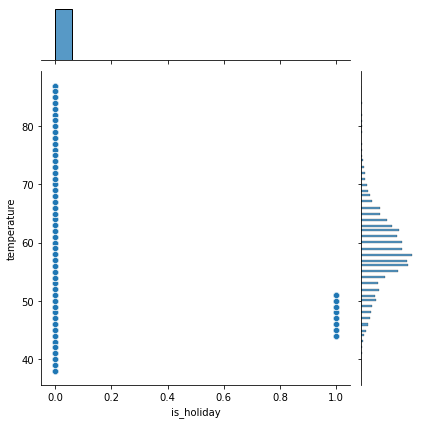

is_holiday VS is_start_of_semester


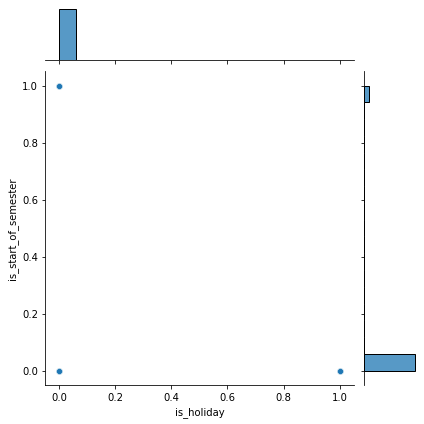

is_holiday VS is_during_semester


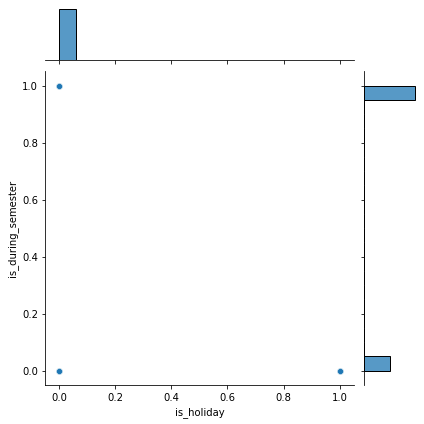

is_holiday VS month


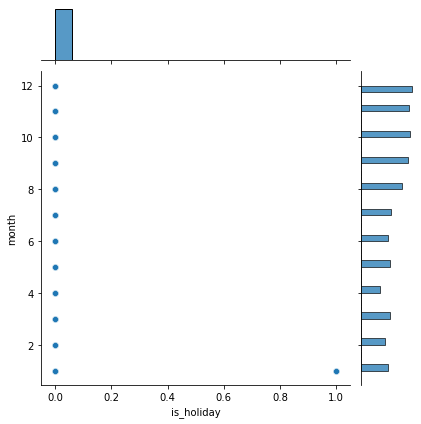

is_holiday VS hour


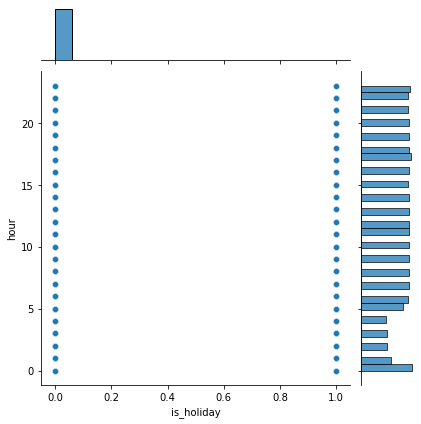

temperature VS number_people


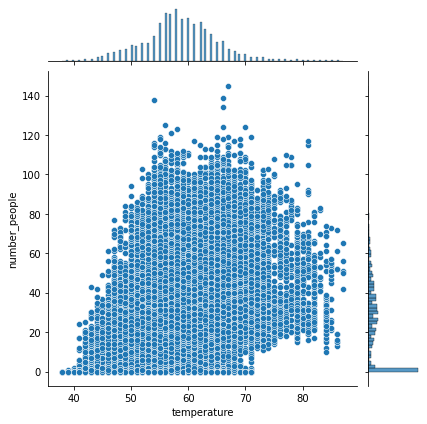

temperature VS timestamp


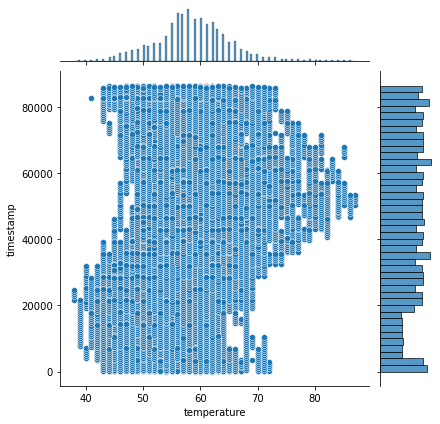

temperature VS day_of_week


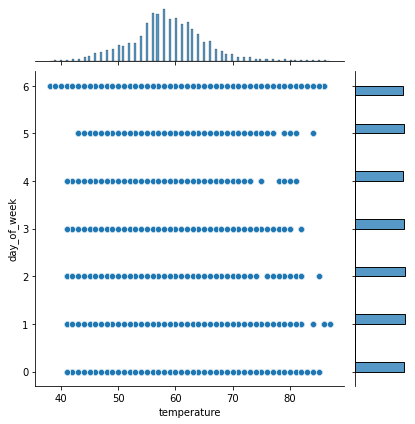

temperature VS is_weekend


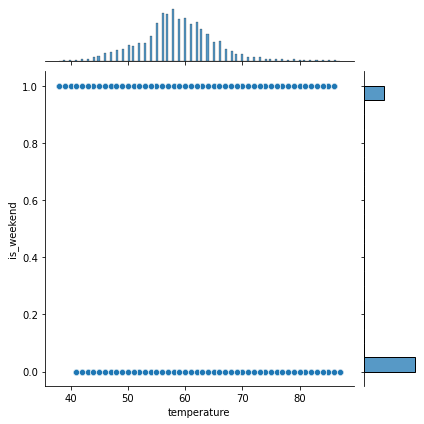

temperature VS is_holiday


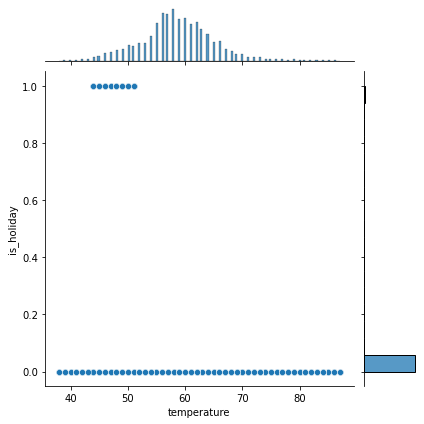

temperature VS is_start_of_semester


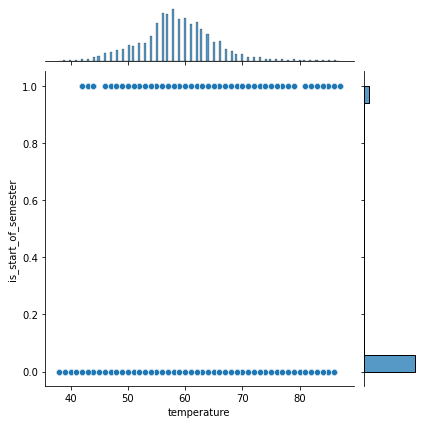

temperature VS is_during_semester


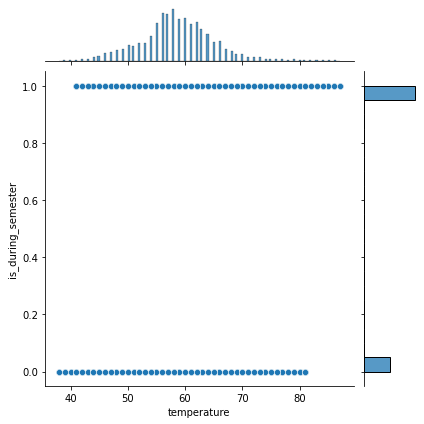

temperature VS month


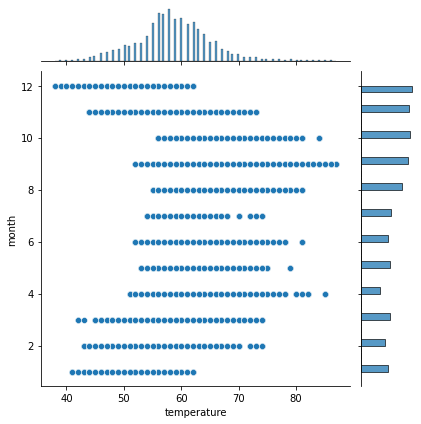

temperature VS hour


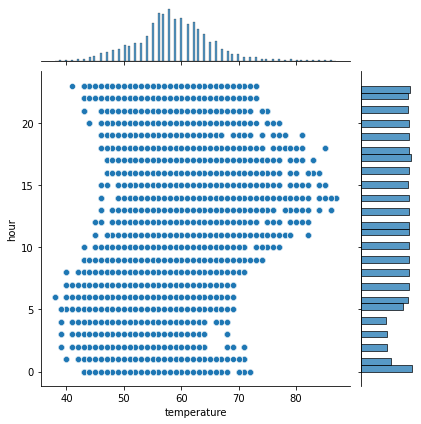

is_start_of_semester VS number_people


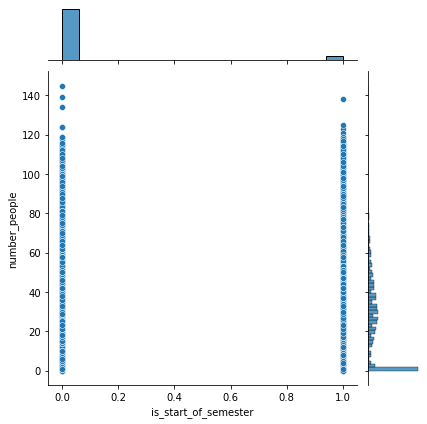

is_start_of_semester VS timestamp


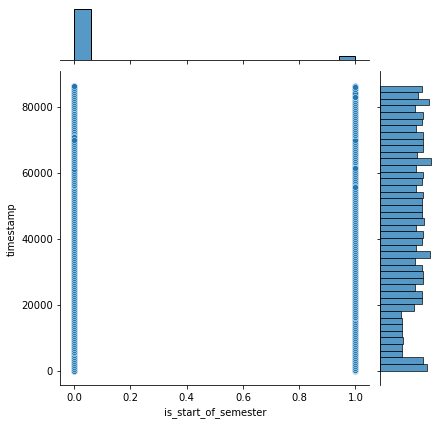

is_start_of_semester VS day_of_week


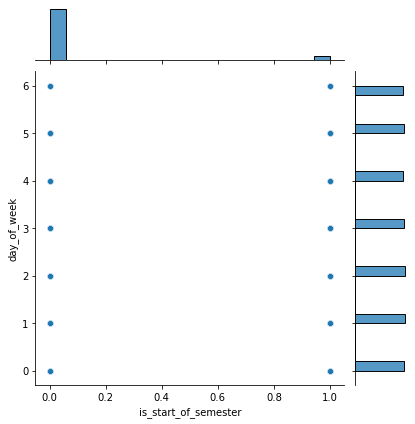

is_start_of_semester VS is_weekend


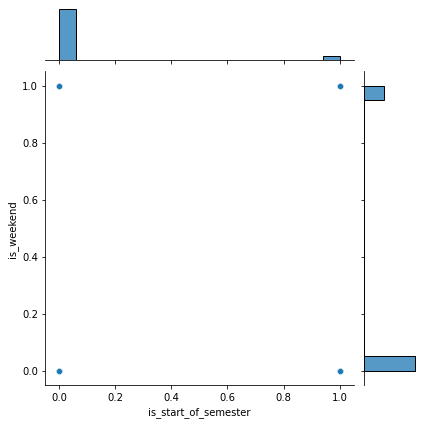

is_start_of_semester VS is_holiday


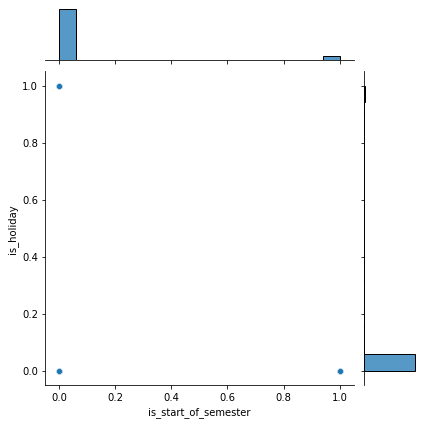

is_start_of_semester VS temperature


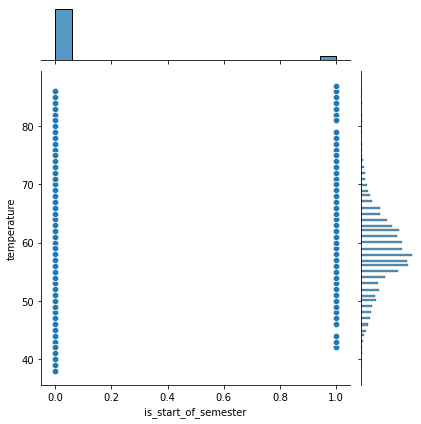

is_start_of_semester VS is_during_semester


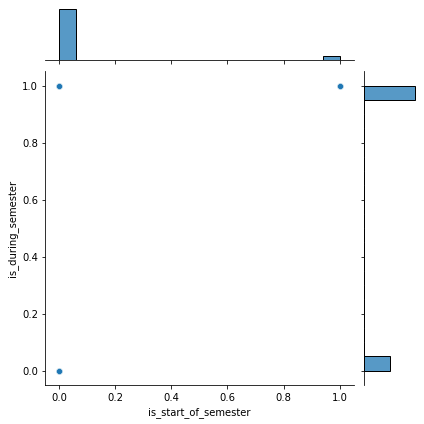

is_start_of_semester VS month


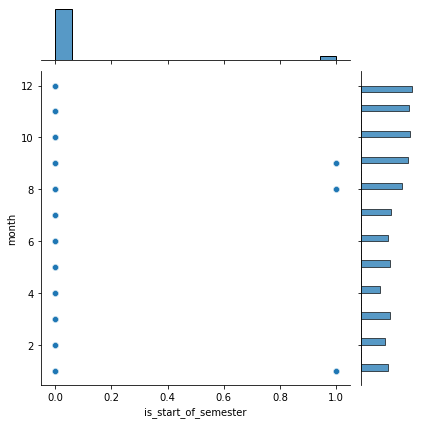

is_start_of_semester VS hour


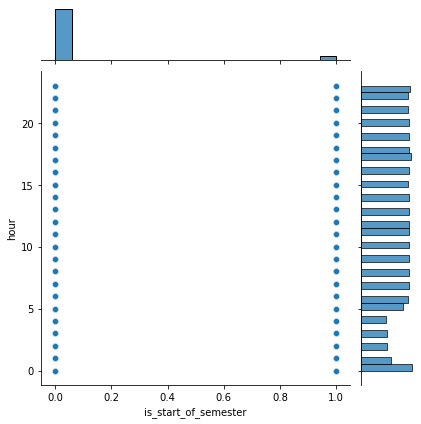

is_during_semester VS number_people


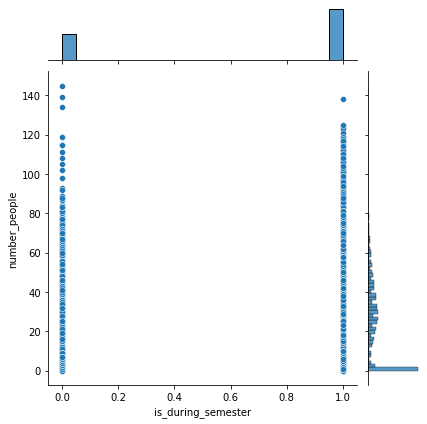

is_during_semester VS timestamp


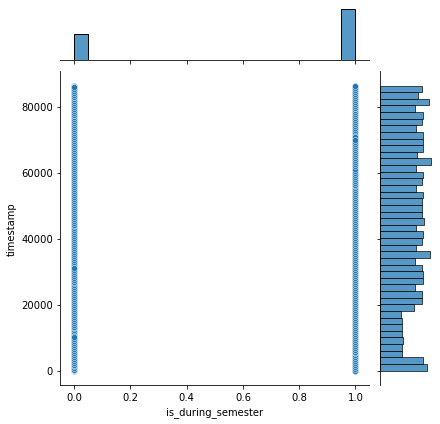

is_during_semester VS day_of_week


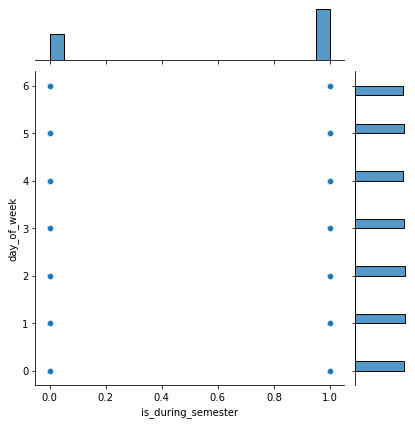

is_during_semester VS is_weekend


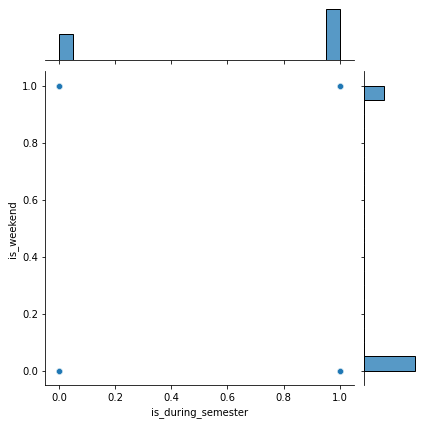

is_during_semester VS is_holiday


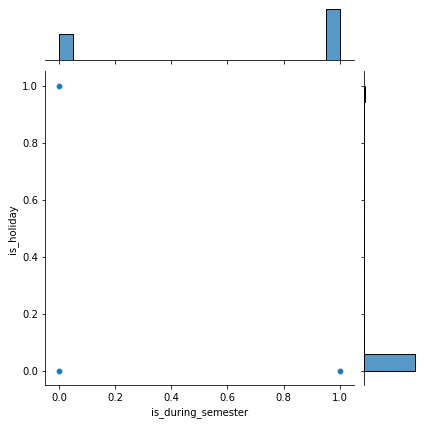

is_during_semester VS temperature


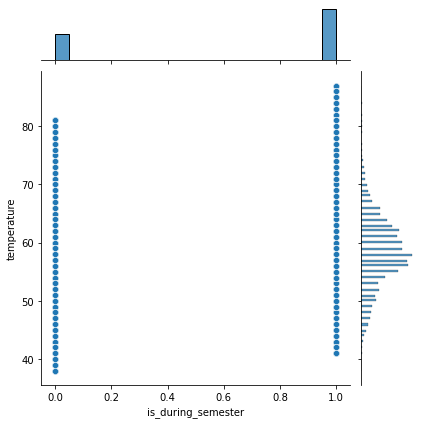

is_during_semester VS is_start_of_semester


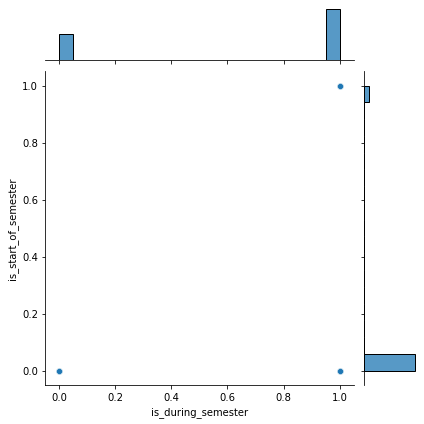

is_during_semester VS month


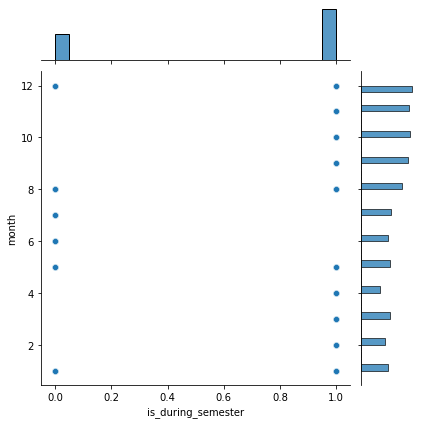

is_during_semester VS hour


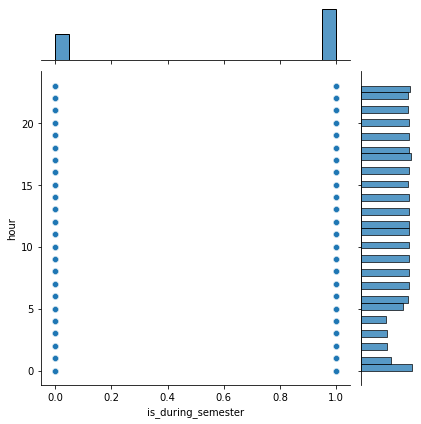

month VS number_people


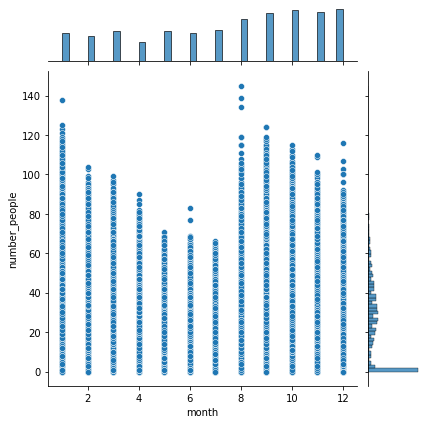

month VS timestamp


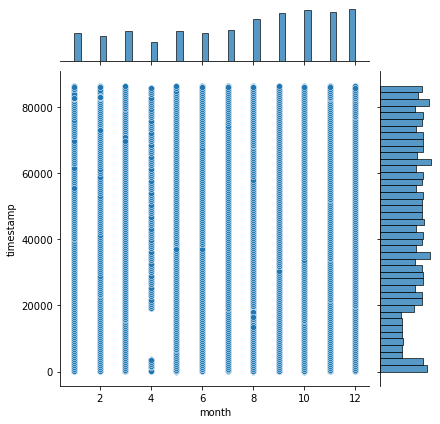

month VS day_of_week


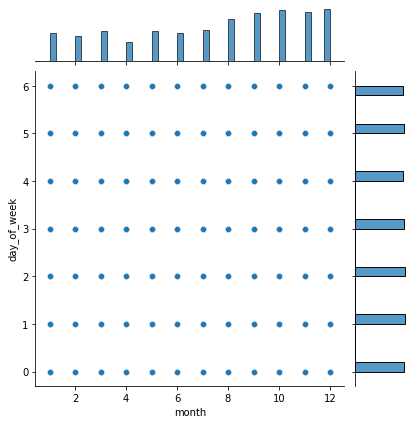

month VS is_weekend


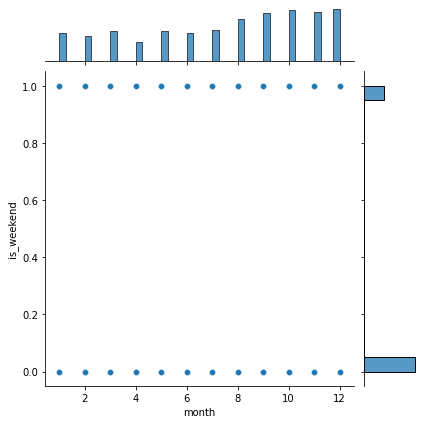

month VS is_holiday


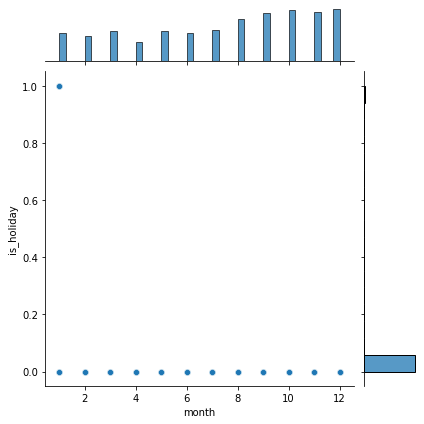

month VS temperature


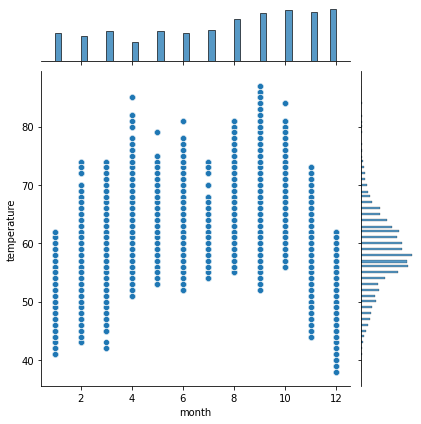

month VS is_start_of_semester


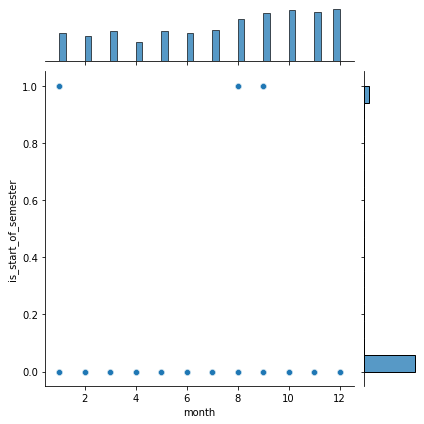

month VS is_during_semester


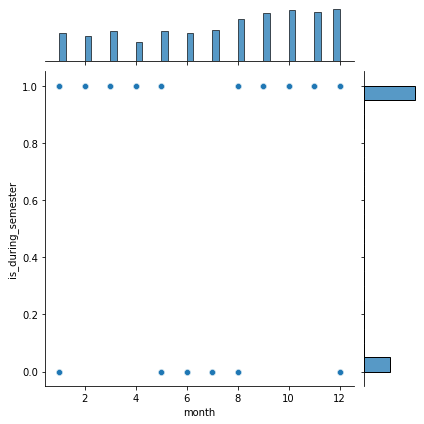

month VS hour


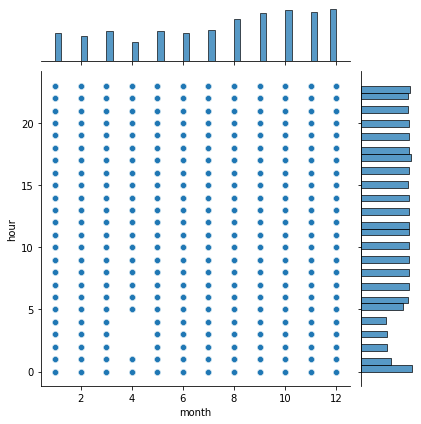

hour VS number_people


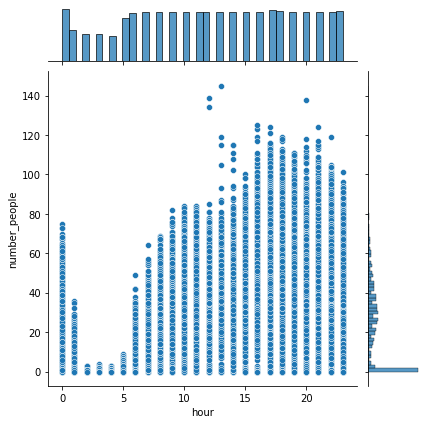

hour VS timestamp


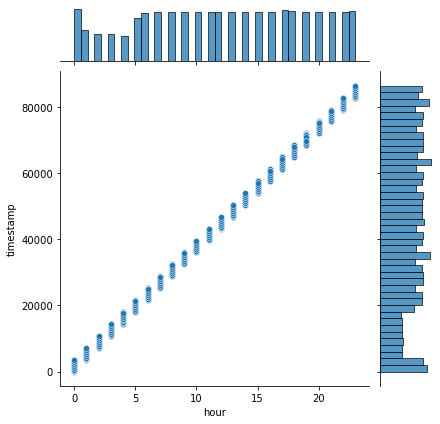

hour VS day_of_week


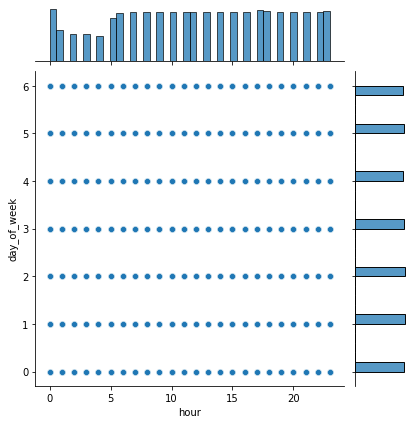

hour VS is_weekend


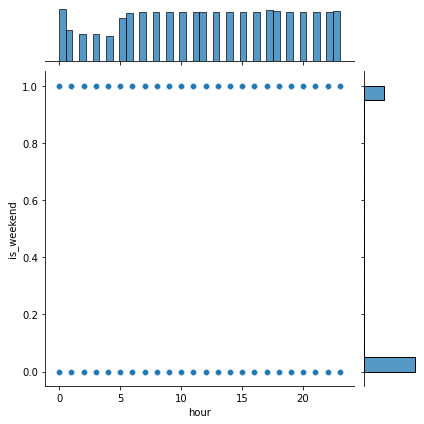

hour VS is_holiday


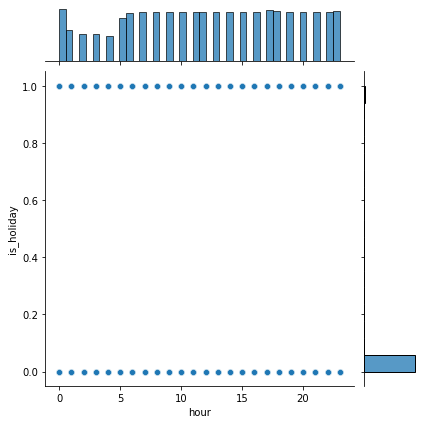

hour VS temperature


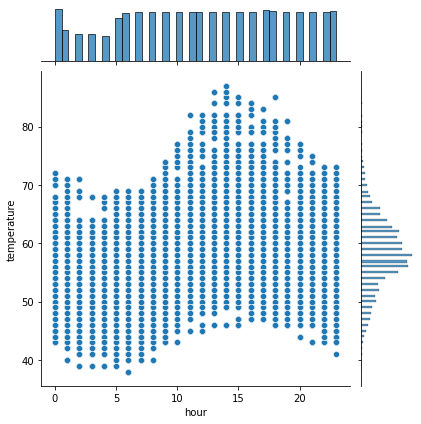

hour VS is_start_of_semester


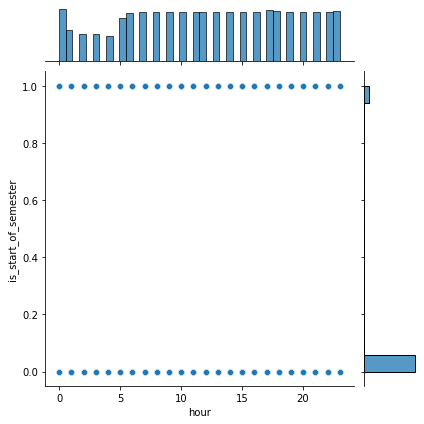

hour VS is_during_semester


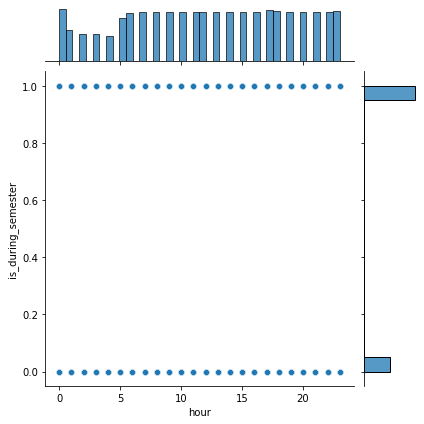

hour VS month


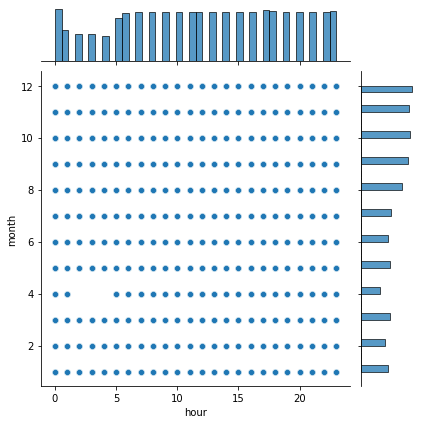

In [14]:
def biavariant(frame):
    for i in frame.columns:
        for j in frame.columns:
            if(i == j):
                pass
            
            elif(frame[i].dtype == 'int64') & (frame[j].dtype == 'int64'):
                print(i, 'VS', j)
                sns.jointplot(x=frame[i], y=frame[j])
                plt.show()
                
biavariant(gd)

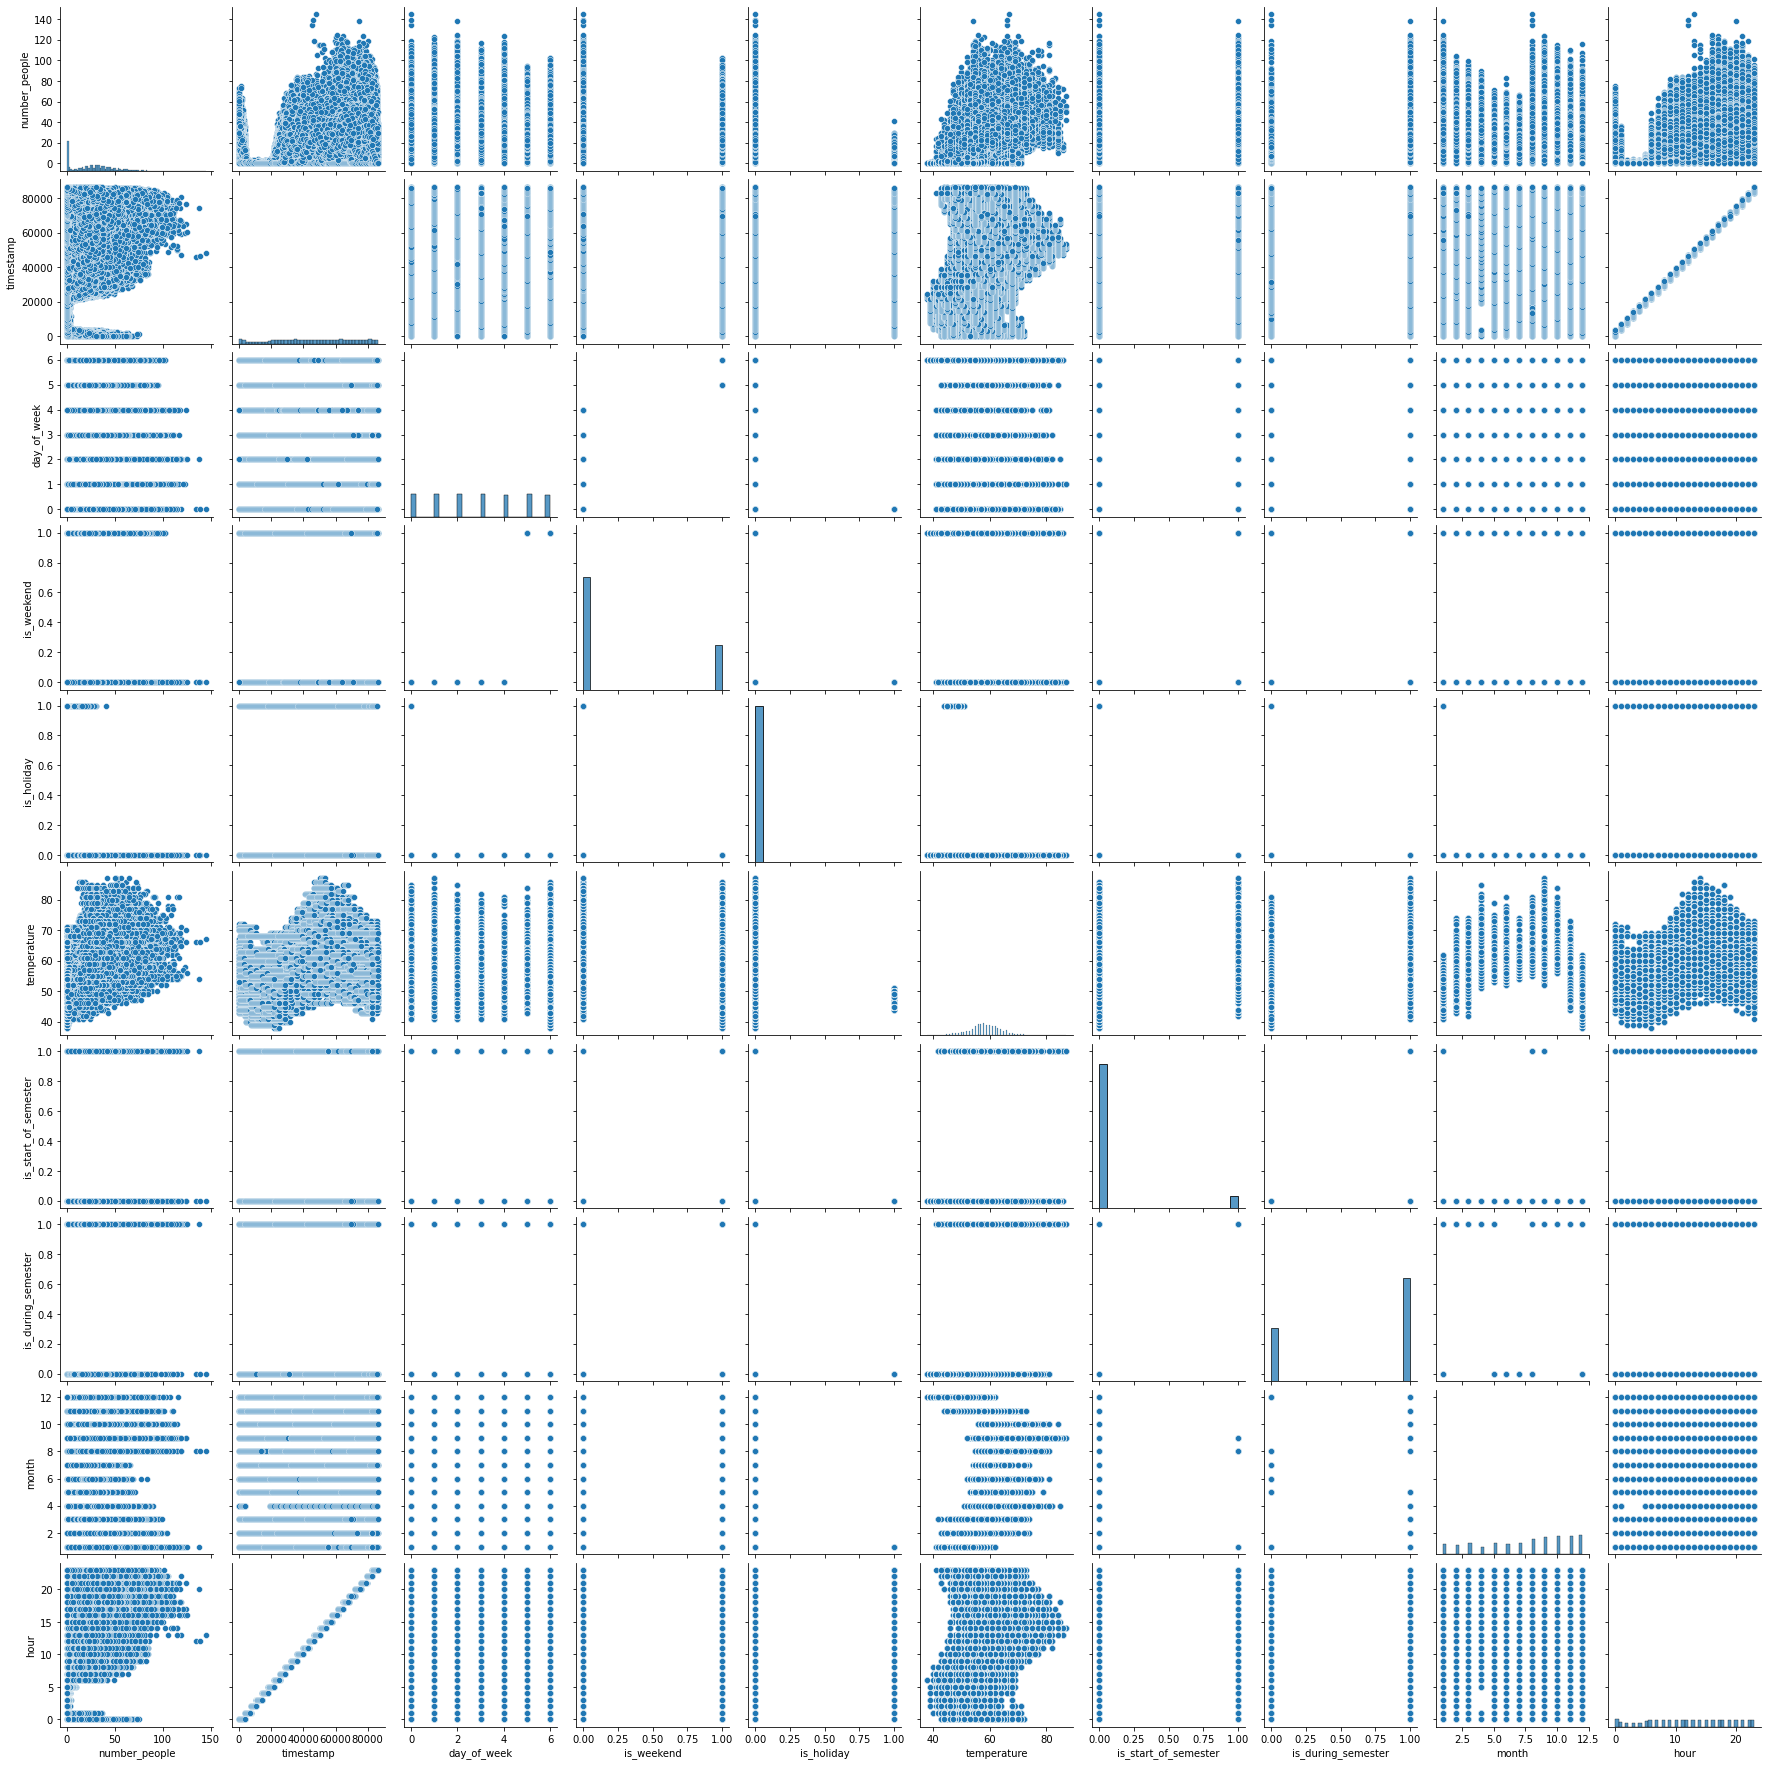

In [15]:
sns.pairplot(gd)

In [16]:
#splitting x axis and y axis datas
x = gd.drop('number_people', axis=1) # Predictors
y = gd['number_people'] # Target Variable

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [18]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [19]:
lr_pred = lr.predict(X_test)
mean_squared_error(Y_test, lr_pred, squared=False)

16.07623729157851

In [20]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
xgb_pred = xgb.predict(X_test)
mean_squared_error(Y_test, xgb_pred, squared=False)

9.000836454186391

In [22]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [23]:
rf_pred = rf.predict(X_test)
mean_squared_error(Y_test, rf_pred, squared=False)

8.707720971121917

Text(0.5, 0, 'Random Forest Feature Importance')

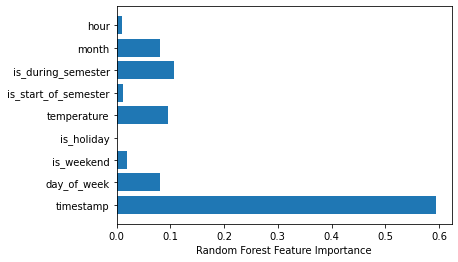

In [40]:
#feature selection
fis = np.sort(rf.feature_importances_)
fis

x = pd.DataFrame(columns = gd.feature_names)
plt.barh(gd.feature_names, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

<AxesSubplot:>

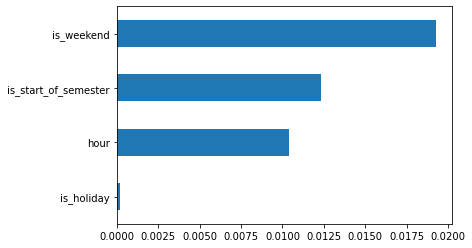

In [43]:
(pd.Series(rf.feature_importances_, index=gd.feature_names)
   .nsmallest(4)
   .plot(kind='barh'))  

In [45]:
#holiday has least feature importance so I will drop it out of the data to make the performance better
X_train = X_train.drop('is_holiday', axis=1)
X_test = X_test.drop('is_holiday', axis=1)

In [47]:
new_rf = RandomForestRegressor()
new_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [51]:
new_rf_pred = new_rf.predict(X_test)
mean_squared_error(Y_test, new_rf_pred, squared=False)

8.769496335357811

In [ ]:
#Hence, Random Forest Regression is the best model for the given data. 